<img src="./images/DLI_Header.png" style="width: 400px;">

# Image Classification of an American Sign Language Dataset

In this section, we will perform the data preparation, model creation, and model training steps using a different dataset: images of hands making letters in [American Sign Language](http://www.asl.gs/).

## Objectives

* Prepare image data for training
* Create and compile a simple model for image classification
* Train an image classification model and observe the results

## American Sign Language Dataset

The [American Sign Language alphabet](http://www.asl.gs/) contains 26 letters. Two of those letters (j and z) require movement, so they are not included in the training dataset.  

<img src="./images/asl.png" style="width: 600px;">

### Kaggle

This dataset is available from the website [Kaggle](http://www.kaggle.com), which is a fantastic place to find datasets and other deep learning resources. In addition to providing resources like datasets and "kernels" that are like these notebooks, Kaggle hosts competitions that you can take part in, competing with others in training highly accurate models.

If you're looking to practice or see examples of many deep learning projects, Kaggle is a great site to visit.

### Reading in the Data

In [9]:
import pandas as pd

In [10]:
train_df = pd.read_csv("data/asl_data/sign_mnist_train.csv")
valid_df = pd.read_csv("data/asl_data/sign_mnist_valid.csv")

### Exploring the Data

In [11]:
train_df.shape

(27455, 785)

In [12]:
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,...,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,...,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,...,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,...,235,234,233,231,230,226,225,222,229,163
4,12,164,167,170,172,176,179,180,184,185,...,92,105,105,108,133,163,157,163,164,179


#### Seperating the target from the dataframe

In [13]:
y_train = train_df.label
y_valid  = valid_df.label

# dropping the target
train_df.drop('label',inplace = True,axis = 1)
valid_df.drop('label',inplace = True,axis = 1)

### Extracting the Images

We now have 27,455 images with 784 pixels each for training...
and 7127 images with 784 pixels each for validating

In [15]:
x_train = train_df.values
x_valid = valid_df.values

In [17]:
x_train.shape,x_valid.shape

((27455, 784), (7172, 784))

...as well as their corresponding labels:

In [18]:
y_train.shape,y_valid.shape

((27455,), (7172,))

## Visualizing the Data

To visualize the images, we will again use the matplotlib library. We don't need to worry about the details of this visualization,

Note that we'll have to reshape the data from its current 1D shape of 784 pixels, to a 2D shape of 28x28 pixels to make sense of the image:

In [21]:
import matplotlib.pyplot as plt

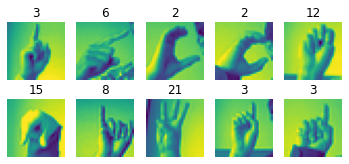

In [44]:
num_img_to_viz = 10
for index in range(num_img_to_viz):
    
    img = x_train[index].reshape(28,28)
    label = y_train[index]
    #plt.figure(figsize = (10,10))
    plt.subplot(2,num_img_to_viz//2,index+1)
    plt.title(label)
    plt.axis('off')
    plt.imshow(img)

#### Normalizing the dataset

This is scaling the pixels between a value of 0 and 1

In [46]:
x_train.min(),x_train.max()

(0, 255)

In [47]:
x_train = x_train/255.
x_valid = x_valid/255.

In [50]:
x_train.max()

1.0

## Categorizing the Labels

In [53]:
from tensorflow import keras

There are 24 labels

In [54]:
y_train = keras.utils.to_categorical(y_train)
y_valid = keras.utils.to_categorical(y_valid)

In [55]:
y_train.shape,y_valid.shape

((27455, 24), (7172, 24))

## Building the Model

In [56]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [62]:
# creating an instance of the model class
model = Sequential()
# defining the model parameters and layers
model.add(Dense(512,activation = 'relu', input_shape = (784,)))
model.add(Dense(512,activation = 'relu'))
model.add(Dense(24,activation = 'softmax'))
#compiling the model
model.compile(loss = 'categorical_crossentropy',metrics = ['accuracy'])

## Summarizing the Model

In [65]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 24)                12312     
Total params: 676,888
Trainable params: 676,888
Non-trainable params: 0
_________________________________________________________________


## Training the Model

In [64]:
model.fit(x_train,y_train,validation_data=(x_valid,y_valid),epochs = 15)

Epoch 1/15
858/858 [==============================] - 2s 2ms/step - loss: 0.2535 - accuracy: 0.9282 - val_loss: 1.2601 - val_accuracy: 0.7436
Epoch 2/15
858/858 [==============================] - 2s 2ms/step - loss: 0.2251 - accuracy: 0.9439 - val_loss: 1.1011 - val_accuracy: 0.7762
Epoch 3/15
858/858 [==============================] - 2s 2ms/step - loss: 0.2023 - accuracy: 0.9533 - val_loss: 1.0187 - val_accuracy: 0.8238
Epoch 4/15
858/858 [==============================] - 2s 2ms/step - loss: 0.1802 - accuracy: 0.9588 - val_loss: 1.0279 - val_accuracy: 0.8187
Epoch 5/15
858/858 [==============================] - 2s 2ms/step - loss: 0.1772 - accuracy: 0.9612 - val_loss: 0.8856 - val_accuracy: 0.8500
Epoch 6/15
858/858 [==============================] - 2s 2ms/step - loss: 0.1609 - accuracy: 0.9661 - val_loss: 1.1817 - val_accuracy: 0.8003
Epoch 7/15
858/858 [==============================] - 2s 2ms/step - loss: 0.1652 - accuracy: 0.9681 - val_loss: 1.1642 - val_accuracy: 0.8346
Epoch 

## Discussion: What happened?

We can see that the training accuracy got to a fairly high level, but the validation accuracy was not as high. What happened here?


This is an example of the model learning to categorize the training data, but performing poorly against new data that it has not been trained on. Essentially, it is memorizing the dataset, but not gaining a robust and general understanding of the problem. This is a common issue called *overfitting*. 

### Clearing the GPU Memory


In [66]:
import IPython
app = IPython.Application.instance()
app.kernel.do_shutdown(True)

{'status': 'ok', 'restart': True}